In [1]:
# Importing necessary packages
import os # enable interaction with the operating system
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
import random # random numbers package
from sklearn.linear_model import Lasso # Lasso regression

**Loading the dataset file**

In [2]:
FILENAME = 'Houseprice_data_scaled.csv'
data = pd.read_csv(FILENAME) 

**Extracting the first 1800 records for train data and remaining 900 for the test data**

In [3]:
# First 1800 data items are training set; the next 600 are the validation set
train = data.iloc[:1800] 
test = data.iloc[1800:2400]

**Now seperate the features and columns of the train and test data**

In [4]:
# Creating the "X" and "y" variables. We drop sale price from "X"
X_train, X_test = train.drop('Sale Price', axis=1), test.drop('Sale Price', axis=1)
y_train, y_test = train[['Sale Price']], test[['Sale Price']] 

**Here are we Implmenting all the mentioned terms**

In [5]:
# Here we records the prodictions from each model output
y_predictions = []
# Here we records the error rate per each iteration
error = []
# This is the loop for all the 100 models
for i in range(100):
    
    # Here do we set the random seed value
    random.seed(i)
    
    # Here we extrect the random 900 indexes value from the 1800 records
    indexes = [i for i in range(len(X_train.values))]
    selected_indexes = random.choices(indexes, k = 900)
    
    # Now select features and labels of that records 
    selected_values_X = [X_train.values[val] for val in selected_indexes]
    selected_values_y = [y_train.values[val][0] for val in selected_indexes]
    
    # Apply the Lasso Model over these records
    regr = Lasso(alpha=0.05).fit(selected_values_X, selected_values_y)
    
    # Get the prediction over the test data
    y_pred = regr.predict(X_test)
    
    # Record the average of the prediction
    y_predictions.append(np.std(y_pred))
    
    # Calculate the error from the actual standard deviation value of the test labels minus the average of the prediction labels
    error.append(np.std(y_test) - np.average(y_predictions))

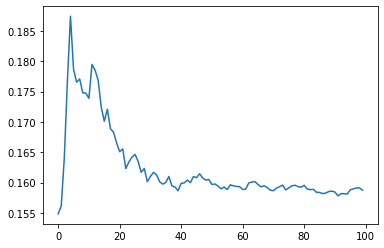

In [6]:
# Plotting the error rate is 
plt.plot(error)
# Here in the below graph shows that the error rate clearly decreasing